# Quantum Increament and Decreament

In [3]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [4]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [5]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [6]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [7]:
def makeCirc(n,state):
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    circ = QuantumCircuit(qr, cr)
    initializedState = stateGenerator(state)
    circ.initialize(initializedState, qr)
    return circ

## Increment

In [8]:
def increment(n, currentState):
    circ = makeCirc(n, currentState)
    for i in range(n-1, 0, -1): #reverse for loop
        # Multi controlled toffoli gate
        circ.mct([j for j in range(n-i, n)], n-i-1) 
    circ.x(n-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [10]:
# help(circ.mct)

In [9]:
n = 6
circ = increment(n, '0'*n)

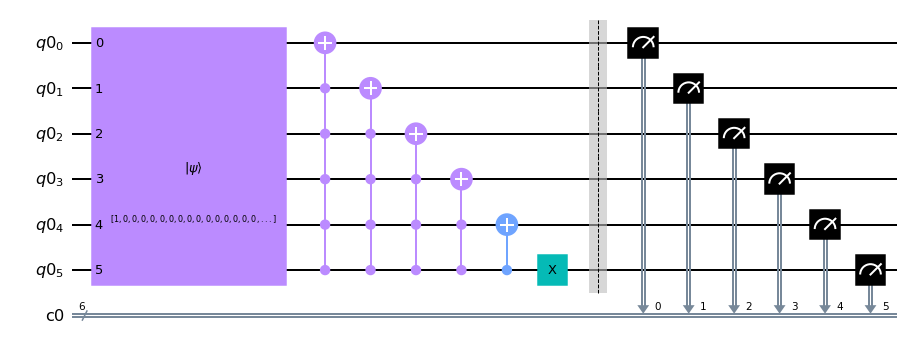

In [10]:
circ.draw()

In [11]:
n = 4
circ = increment(n, '0'*n)
for i in range(0, 15):
    circ = increment(n, getMeasure(circ, 1)[0][::-1])
    print(getMeasure(circ, 1)[0][::-1])

0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111
0000


## Decrement

In [12]:
def decrement(n, currentState):
    circ = makeCirc(n, currentState)
    circ.x(n-1)
    for i in range(1, n): #reverse for loop
        # Multi controlled toffoli gate
        circ.mct([j for j in range(n-i, n)], n-i-1) 
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [13]:
n = 6
dcirc = decrement(n, '0'*n)

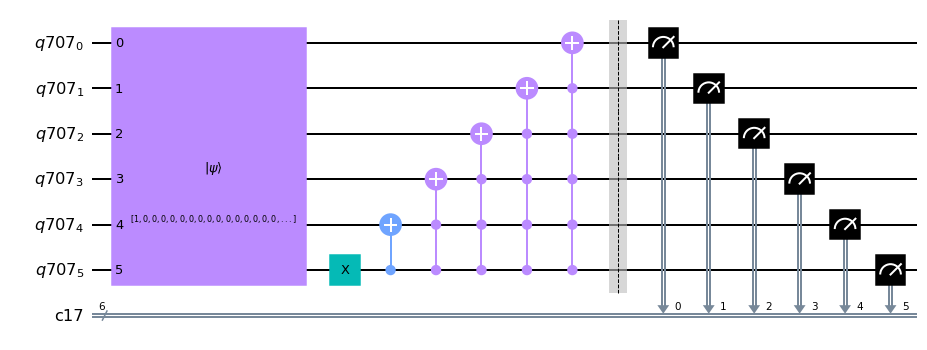

In [14]:
dcirc.draw(fold=-1)

In [15]:
n = 4
circ = decrement(n, '0'*n)
for i in range(0, 15):
    circ = decrement(n, getMeasure(circ, 1)[0][::-1])
    print(getMeasure(circ, 1)[0][::-1])

1110
1101
1100
1011
1010
1001
1000
0111
0110
0101
0100
0011
0010
0001
0000
